In [75]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [76]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
train_data["Sex"] = train_data["Sex"].replace({'female':0, 'male':1})
train_data["Embarked"] = train_data["Embarked"].apply(lambda item: {'C':1, 'Q':2, 'S':3}.get(item))

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,3.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,3.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,3.0


In [78]:
from sklearn.ensemble import RandomForestClassifier
# replacing NaN with predicted values
def Calc_NaN(data, name, features):    
    y = data[data[name].notnull()][name].apply(lambda item: int(item))    
    X = pd.get_dummies(data[data[name].notnull()][features])
    NaN = data[data[name].isnull()]
    X_NaN = pd.get_dummies(NaN[features])
    model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
    model.fit(X, y)
    predictions = model.predict(X_NaN)

    data = data.set_index('PassengerId')
    updt = pd.DataFrame({'PassengerId': NaN.PassengerId, name: predictions}).set_index('PassengerId')
    data.update(updt)
    data.reset_index(inplace=True)
    
    return data

In [79]:
train_data = Calc_NaN(train_data, "Embarked", ["Pclass", "Sex", "SibSp", "Parch"])
train_data = Calc_NaN(train_data, "Age", ["Pclass", "Sex", "SibSp", "Parch"])

In [80]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


In [81]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

test_data["Sex"] = test_data["Sex"].replace({'female':0, 'male':1})
test_data["Embarked"] = test_data["Embarked"].apply(lambda item: {'C':1, 'Q':2, 'S':3}.get(item))
test_data = Calc_NaN(test_data, "Age", ["Pclass", "Sex", "SibSp", "Parch"])
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [82]:
women = train_data.loc[train_data.Sex == 0]["Survived"]
print("% of women who survived:", sum(women)/len(women))
men = train_data.loc[train_data.Sex == 1]["Survived"]
print("% of men who survived:", sum(men)/len(men))

% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


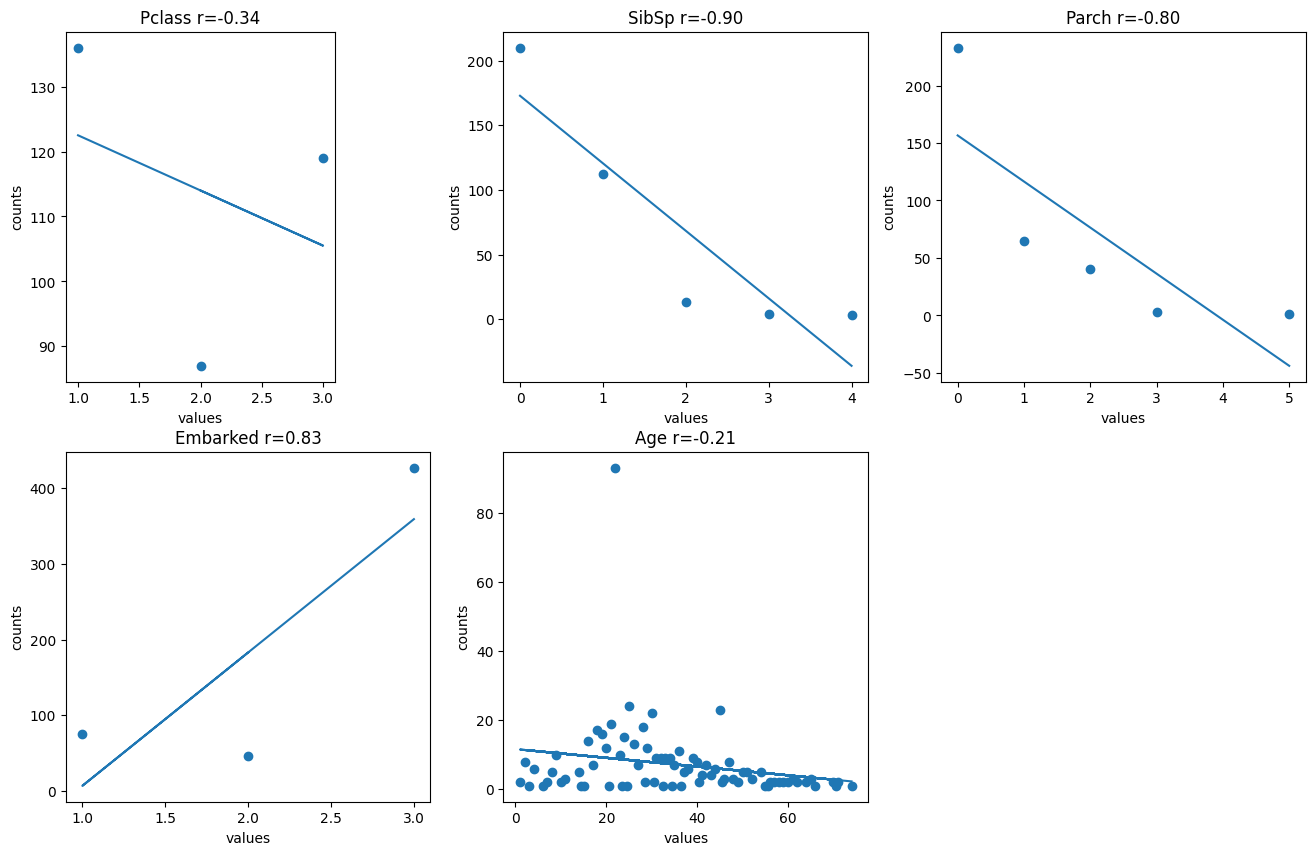

In [83]:
import matplotlib.pyplot as plt
value_count = train_data.loc[train_data.Survived == 1]["Pclass"].value_counts()
x = np.array(value_count.index.tolist())
y = np.array(value_count.tolist())
b1 = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x ** 2) - np.mean(x) ** 2)
b0 = np.mean(y) - b1 * np.mean(x)
plt.figure(figsize=(16, 10))
plt.subplot(2, 4, 1)
plt.scatter(x, y)
plt.plot(x, b0 + b1 * x)
plt.title(f"Pclass r={np.corrcoef(x, y)[1][0]:.2f}")
plt.xlabel('values')
plt.ylabel('counts')

value_count = train_data.loc[train_data.Survived == 1]["SibSp"].value_counts()
x = np.array(value_count.index.tolist())
y = np.array(value_count.tolist())
b1 = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x ** 2) - np.mean(x) ** 2)
b0 = np.mean(y) - b1 * np.mean(x)
plt.subplot(2, 3, 2)
plt.scatter(x, y)
plt.plot(x, b0 + b1 * x)
plt.title(f"SibSp r={np.corrcoef(x, y)[1][0]:.2f}")
plt.xlabel('values')
plt.ylabel('counts')

value_count = train_data.loc[train_data.Survived == 1]["Parch"].value_counts()
x = np.array(value_count.index.tolist())
y = np.array(value_count.tolist())
b1 = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x ** 2) - np.mean(x) ** 2)
b0 = np.mean(y) - b1 * np.mean(x)
plt.subplot(2, 3, 3)
plt.scatter(x, y)
plt.plot(x, b0 + b1 * x)
plt.title(f"Parch r={np.corrcoef(x, y)[1][0]:.2f}")
plt.xlabel('values')
plt.ylabel('counts')

value_count = train_data.loc[train_data.Survived == 0]["Embarked"].value_counts()
x = np.array(value_count.index.tolist())
y = np.array(value_count.tolist())
b1 = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x ** 2) - np.mean(x) ** 2)
b0 = np.mean(y) - b1 * np.mean(x)
plt.subplot(2, 3, 4)
plt.scatter(x, y)
plt.plot(x, b0 + b1 * x)
plt.title(f"Embarked r={np.corrcoef(x, y)[1][0]:.2f}")
plt.xlabel('values')
plt.ylabel('counts')

value_count = train_data.loc[train_data.Survived == 0]["Age"].value_counts()
x = np.array(value_count.index.tolist())
y = np.array(value_count.tolist())
b1 = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x ** 2) - np.mean(x) ** 2)
b0 = np.mean(y) - b1 * np.mean(x)
plt.subplot(2, 3, 5)
plt.scatter(x, y)
plt.plot(x, b0 + b1 * x)
plt.title(f"Age r={np.corrcoef(x, y)[1][0]:.2f}")
plt.xlabel('values')
plt.ylabel('counts')

plt.show()

In [84]:
from sklearn.metrics import r2_score as r2

def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))    

In [85]:
# coefficient of determination
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold

y = train_data["Survived"]
features = ["Age", "Pclass", "Sex", "SibSp", "Parch", "Embarked"]
X = pd.get_dummies(train_data[features])

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=21)

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)

y_train_preds = model.predict(X_train)
y_valid_preds = model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_valid_preds)

cv_score = cross_val_score(model, X_train, y_train, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=21))
cv_score.mean()

Train R2:	0.342
Test R2:	0.217


0.2284821524558532

In [87]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold

y = train_data["Survived"]
features = ["Age", "Pclass", "Sex", "SibSp", "Parch", "Embarked"]
X = pd.get_dummies(train_data[features])

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=21)

model = CatBoostRegressor(learning_rate=0.03, depth=9, l2_leaf_reg=2, iterations=1000, loss_function='RMSE', eval_metric='RMSE', random_seed=21, silent=True,)
model.fit(X_train, y_train)

y_train_preds = model.predict(X_train)
y_valid_preds = model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_valid_preds)

cv_score = cross_val_score(model, X_train, y_train, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=21))
cv_score.mean()

Train R2:	0.765
Test R2:	0.471


0.3055311806657093

In [86]:
X_test = pd.get_dummies(test_data[features])
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
